In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils

Using TensorFlow backend.


# 讀檔

In [2]:
# Differentiate between test set and training set
data_path = "D:/夢想的價值/108-1 深度學習/1014/data/"
df_train = pd.read_csv(data_path + 'Train.csv')
df_test = pd.read_csv(data_path + 'Test.csv')
print(df_train.shape)
y_train = df_train[["y"]]
# y_train
y_test = df_test[["y"]]
y_test.shape

(3500, 21)


(1500, 1)

In [3]:
def __concat(e_test):

    x = e_test[str(0)]
    for i in range(1,len(e_test)):
    

        x = pd.concat([x,e_test[str(i)]])
    x.reset_index(inplace=True)
    x = x[["a"]]
    x.columns = ["x1","x2"]    

    return x

In [4]:
def __transpose(dataframe, index = None):
    e_dict = {}
    for i in range(len(dataframe)):
        
        a = dataframe[i:i+1].T
#         print(a)
        a.columns.name = None
        # 先轉置
        b = a[0:10]
        b.reset_index(inplace=True)
        # 把x1切出來


        c = a[10:20]
        c.reset_index(inplace=True)
        #把x2找出來
        d = pd.concat([b,c], axis = 1)
        #把x1、x2併起來
        e = d[[i]]
        e = e.rename(columns={i: "a"})
       
        e_dict[str(i)] = e
    df = __concat(e_dict)

    return df

In [5]:
x_train = __transpose(df_train)

In [6]:
x_test = __transpose(df_test)

In [7]:
x_train.head

<bound method NDFrame.head of              x1        x2
0      0.296808  0.459019
1      0.632320  0.447966
2      0.495099  0.454233
3      0.558432  0.452497
4      0.656572  0.438392
...         ...       ...
34995  0.181954  0.681914
34996  0.299088  0.672424
34997  0.301954  0.662301
34998  0.341824  0.643329
34999  0.887296  0.503394

[35000 rows x 2 columns]>

In [8]:
x_test

,x1,x2
0,0.643755,0.456749
1,0.586580,0.451464
2,0.459161,0.462264
3,0.610078,0.454020
4,0.432018,0.468236
...,...,...
14995,0.280782,0.495722
14996,0.176743,0.513364
14997,0.183648,0.529465
14998,0.252313,0.530349


In [9]:
get_ipython().magic('matplotlib inline')


import numpy as np
import matplotlib.pyplot as plt


np.random.seed(25)

In [10]:
print(f"x_train shape:{x_train.shape}")
print(f"x_test shape:{x_test.shape}")
x_train = x_train.values.reshape(3500,10,2)
# print(x_train)
x_test = x_test.values.reshape(1500,10,2)
# print(x_test)
print(f"x_train shape:{x_train.shape}")
print(f"x_test shape:{x_test.shape}")
print("\n--- Create neural network model ---\n")

num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
input_shape = num_time_periods*num_sensors
print(f"input_shape :{input_shape}")

x_train shape:(35000, 2)
x_test shape:(15000, 2)
[[[0.29680824 0.45901857]
  [0.63231968 0.44796618]
  [0.49509927 0.45423279]
  ...
  [0.51118372 0.45484527]
  [0.51181201 0.45899944]
  [0.24893189 0.49632799]]

 [[0.73988439 0.58940202]
  [0.66335763 0.57443028]
  [0.60454888 0.56688182]
  ...
  [0.59952249 0.57531343]
  [0.343428   0.60071263]
  [0.27217894 0.6351022 ]]

 [[0.50992712 0.60426553]
  [0.68547374 0.5865127 ]
  [0.50753958 0.59120276]
  ...
  [0.47210354 0.61419527]
  [0.76124654 0.5868733 ]
  [0.43553657 0.60064889]]

 ...

 [[0.25237785 0.94457513]
  [0.27081433 0.94135865]
  [0.18254072 0.95770728]
  ...
  [0.29153094 0.96448121]
  [0.32136808 0.95005518]
  [0.88371336 0.81092758]]

 [[0.35485342 0.27275365]
  [0.13687296 0.29923173]
  [0.29061889 0.29161665]
  ...
  [0.2523127  0.30967665]
  [0.26286645 0.30821057]
  [0.56925081 0.23880983]]

 [[0.21570033 0.70449546]
  [0.25309446 0.70520888]
  [0.36521173 0.68105327]
  ...
  [0.3019544  0.66230053]
  [0.3418241  0

In [11]:
x_train = x_train.reshape(x_train.shape[0], input_shape).astype("float32")
print(x_train)
x_test = x_test.reshape(x_test.shape[0], input_shape).astype("float32")
print(x_test)

[[0.29680824 0.45901856 0.6323197  ... 0.45899943 0.24893188 0.496328  ]
 [0.7398844  0.589402   0.6633576  ... 0.6007126  0.27217895 0.6351022 ]
 [0.5099271  0.6042655  0.68547374 ... 0.5868733  0.43553656 0.6006489 ]
 ...
 [0.25237784 0.94457513 0.27081433 ... 0.9500552  0.88371336 0.81092757]
 [0.35485342 0.27275366 0.13687296 ... 0.30821058 0.5692508  0.23880984]
 [0.21570033 0.7044955  0.25309446 ... 0.64332896 0.88729644 0.50339377]]
[[0.6437547  0.45674938 0.58657956 ... 0.44563818 0.31905    0.4741125 ]
 [0.52538323 0.34491262 0.6294295  ... 0.32726896 0.41618496 0.34348258]
 [0.75659716 0.52478087 0.44810253 ... 0.56817615 0.51419955 0.5720265 ]
 ...
 [0.29198697 0.41051212 0.2704886  ... 0.48181733 0.5254072  0.4221452 ]
 [0.30247557 0.76143366 0.17140065 ... 0.77442044 0.5696417  0.70492965]
 [0.1569381  0.5459902  0.17973942 ... 0.53034943 0.63954395 0.44536784]]


In [12]:
y_num = 5
# print(f'y_train.head{y_train.head}')
# print(f'y_train.head{y_test.head}')


y_train = np_utils.to_categorical(y_train,y_num).astype("float32")
y_test = np_utils.to_categorical(y_test,y_num).astype("float32")


In [13]:
print(f"y_train shape:{y_train.shape}")
print(f"y_test shape:{y_test.shape}")

y_train shape:(3500, 5)
y_test shape:(1500, 5)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# 1D CNN neural network
model_m = Sequential()
model_m.add(Reshape((10, num_sensors), input_shape=(input_shape,)))  ##將一個樣本的 20 個數值轉為 10*2 矩陣
model_m.add(Conv1D(100, 2, activation='relu', input_shape=(10, num_sensors)))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 2, activation='relu'))
model_m.add(Conv1D(160, 2, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(5,kernel_initializer = "RandomUniform",activation='softmax'))
# model_m.add(Dense(5, activation='softmax'))
print(model_m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 10, 2)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 9, 100)            500       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3, 100)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2, 160)            32160     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1, 160)            51360     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 160)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 160)               0         
__________

In [21]:
print("\n--- Fit the model ---\n")

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ReduceLROnPlateau

learning_rate_function = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
train_history = model_m.fit(x=x_train, y= y_train, validation_split=0.18, epochs=30, batch_size = 50, verbose=1)

# %%

print("\n--- Learning curve of model training ---\n")

get_ipython().magic('matplotlib inline')
## IPython有一組預先定義好的所謂的魔法函數（Magic Functions），你可以通過命令列的語法形式來訪問它們。


--- Fit the model ---

Train on 2870 samples, validate on 630 samples
Epoch 1/30
2870/2870 [==============================] - 1s 262us/step - loss: 0.4115 - acc: 0.8275 - val_loss: 0.8280 - val_acc: 0.6302
Epoch 2/30
2870/2870 [==============================] - 0s 92us/step - loss: 0.3785 - acc: 0.8359 - val_loss: 0.1328 - val_acc: 0.9540
Epoch 3/30
2870/2870 [==============================] - 0s 98us/step - loss: 0.3951 - acc: 0.8411 - val_loss: 0.2864 - val_acc: 0.8905
Epoch 4/30
2870/2870 [==============================] - 0s 92us/step - loss: 0.3688 - acc: 0.8474 - val_loss: 0.1424 - val_acc: 0.9492
Epoch 5/30
2870/2870 [==============================] - 0s 94us/step - loss: 0.3461 - acc: 0.8509 - val_loss: 0.2976 - val_acc: 0.8905
Epoch 6/30
2870/2870 [==============================] - 0s 114us/step - loss: 0.3443 - acc: 0.8578 - val_loss: 0.1209 - val_acc: 0.9619
Epoch 7/30
2870/2870 [==============================] - 0s 94us/step - loss: 0.3368 - acc: 0.8561 - val_loss: 0.0550 

In [22]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

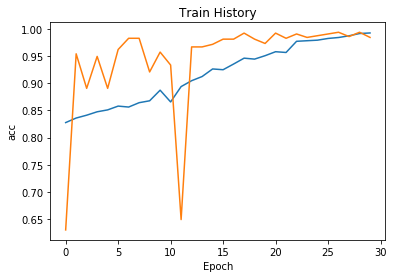

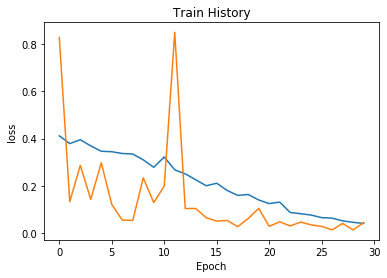

1500/1500 [==============================] - 0s 29us/step

Accuracy 0.9973333333333333%

[0 0 0 ... 4 4 4]


In [23]:
show_train_history(train_history, 'acc', 'val_acc')

show_train_history(train_history, 'loss', 'val_loss')

score = model_m.evaluate(x_test, y_test, verbose=1)
# score = model_m.evaluate(x_test, y_test)
print()
print("Accuracy {}%".format(score[1]))

results = model_m.predict_classes(x_test)
print()
print(results)



--- Confusion matrix for test data ---



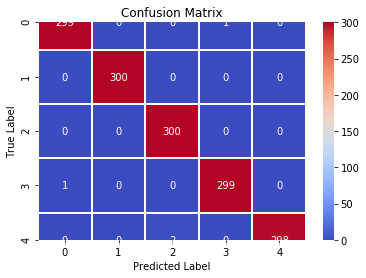


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       0.99      1.00      1.00       300
           3       1.00      1.00      1.00       300
           4       1.00      0.99      1.00       300

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [34]:
def show_confusion_matrix(validations, predictions):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, cmap="coolwarm",linecolor='white', linewidths=1,
                xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    
    
print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model_m.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)
LABELS = ['0','1','2','3','4']
show_confusion_matrix(max_y_test, max_y_pred_test)

# %%

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test)) 


# RNN

In [38]:
x_train_reshape = x_train.reshape(3500,10,2)
print(f"x_train_reshape shape{x_train_reshape.shape}")
x_test_reshape = x_test.reshape(1500,10,2)
print(f"x_test_reshape shape{x_test_reshape.shape}")

x_train_reshape shape(3500, 10, 2)
x_test_reshape shape(1500, 10, 2)


In [44]:
#一對一模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers import SimpleRNN, Activation, Dense, RNN
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

## build one To One Model(shape):
model = Sequential()
##  SimpleRNN  注意他的 input 格式!!(先變成三維，把第二維、三維放在這邊)
model.add(SimpleRNN(units=128, input_shape=(x_train_reshape.shape[1], x_train_reshape.shape[2])))
#units隱藏層神經元個數
#model.add(SimpleRNN(128, input_shape = (1, 12), activation = 'relu'))
num_classes = 5
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation = 'relu'))#三層隱藏層
model.add(Dropout(0.1))
model.add(Dense(num_classes,kernel_initializer = "RandomUniform", activation='softmax'))
#num_classes不能改
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
model.summary()

print("\n--- Fit the model ---\n")

train_history = model.fit(x=x_train_reshape, y= y_train, validation_split=0.17, epochs=200, batch_size=50, verbose=2)


print("\n--- Learning curve of model training ---\n")

get_ipython().magic('matplotlib inline')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 128)               16768     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 85        
Total para

Epoch 82/200
 - 0s - loss: 0.0447 - acc: 0.9907 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 83/200
 - 0s - loss: 0.0609 - acc: 0.9793 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 84/200
 - 0s - loss: 0.0835 - acc: 0.9749 - val_loss: 0.1153 - val_acc: 0.9496
Epoch 85/200
 - 0s - loss: 0.0420 - acc: 0.9869 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 86/200
 - 0s - loss: 0.0115 - acc: 0.9997 - val_loss: 8.8473e-04 - val_acc: 1.0000
Epoch 87/200
 - 0s - loss: 0.0411 - acc: 0.9876 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 88/200
 - 0s - loss: 0.0432 - acc: 0.9900 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 89/200
 - 0s - loss: 0.0160 - acc: 0.9972 - val_loss: 3.5495e-04 - val_acc: 1.0000
Epoch 90/200
 - 0s - loss: 0.0233 - acc: 0.9938 - val_loss: 0.1389 - val_acc: 0.9277
Epoch 91/200
 - 0s - loss: 0.0736 - acc: 0.9742 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 92/200
 - 0s - loss: 0.2354 - acc: 0.9256 - val_loss: 0.0598 - val_acc: 1.0000
Epoch 93/200
 - 0s - loss: 0.0776 - acc: 0.9756 - val_los

Epoch 177/200
 - 0s - loss: 0.0696 - acc: 0.9769 - val_loss: 0.0106 - val_acc: 1.0000
Epoch 178/200
 - 0s - loss: 0.0134 - acc: 0.9986 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 179/200
 - 0s - loss: 0.0099 - acc: 0.9990 - val_loss: 0.0138 - val_acc: 0.9950
Epoch 180/200
 - 0s - loss: 0.0227 - acc: 0.9938 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 181/200
 - 0s - loss: 0.0087 - acc: 0.9972 - val_loss: 0.0045 - val_acc: 0.9983
Epoch 182/200
 - 0s - loss: 0.0098 - acc: 0.9972 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 183/200
 - 0s - loss: 0.0088 - acc: 0.9983 - val_loss: 4.9315e-04 - val_acc: 1.0000
Epoch 184/200
 - 0s - loss: 0.0073 - acc: 0.9983 - val_loss: 5.2190e-04 - val_acc: 1.0000
Epoch 185/200
 - 0s - loss: 0.0151 - acc: 0.9959 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 186/200
 - 0s - loss: 0.1856 - acc: 0.9442 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 187/200
 - 0s - loss: 0.1755 - acc: 0.9473 - val_loss: 0.0141 - val_acc: 0.9983
Epoch 188/200
 - 0s - loss: 0.0524 - acc: 0.98

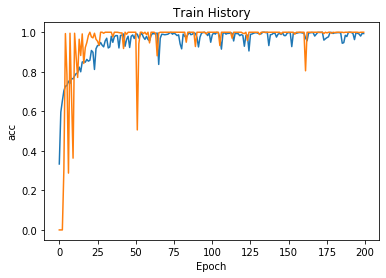

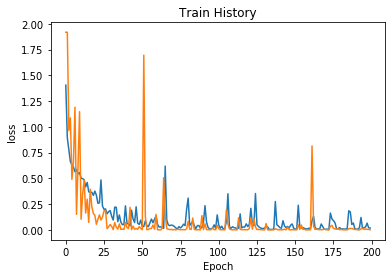

1500/1500 [==============================] - 0s 40us/step

Accuracy 0.9993333333333333%

[0 0 0 ... 4 4 4]


In [45]:
show_train_history(train_history, 'acc', 'val_acc')

show_train_history(train_history, 'loss', 'val_loss')

score = model.evaluate(x_test_reshape, y_test, verbose=1)
# score = model_m.evaluate(x_test, y_test)
print()
print("Accuracy {}%".format(score[1]))

results = model.predict_classes(x_test_reshape)
print()
print(results)


--- Confusion matrix for test data ---



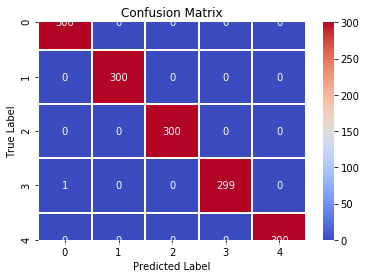


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       300
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       300

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [50]:
def show_confusion_matrix(validations, predictions):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, cmap="coolwarm",linecolor='white', linewidths=1,
                xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    
    
print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model.predict(x_test_reshape)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)
LABELS = ['0','1','2','3','4']
show_confusion_matrix(max_y_test, max_y_pred_test)

# %%

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test)) 